<a href="https://colab.research.google.com/github/jhiltonsantos/ADS-Estatistica-IFPI/blob/master/Acidentes_aereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados de Acidentes Aereos (Período 2008-2018)**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Objetivos
  Identificar, através dos anos, quais os principais tipos de acidentes em cada região do país,e observar as rotas com maiores números de ocorrências.Para isso iremos levantar:<br>  
  •Apontar qual a relação entre a quantidade de acidentes e as rotas<br>  <br>•Identificar quais os principais tipo de acidentes em cada região do país;<br>
  <br>•Observar características das aeronaves, como: ano de fabricação, modelo, tipo de motor,quantidade assentos, fabricante. E sua relação com o tipo de acidente.<br>



### Links para Ajuda

In [0]:
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
# https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b
# https://plot.ly/python/bubble-maps/
# https://python-visualization.github.io/folium/quickstart.html

### Bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from itertools import product
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import folium
import os

from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#py.init_notebook_mode(connected=True)


### Funções

In [0]:
def tem_numero(string): # Retornar se string possue numero
  return any(char.isdigit() for char in string)

def remove_repetidos(array): # Remover Elementos Repetidos do Array
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

## Importar Dados

In [4]:
dados = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/Projeto%20Final/accidents_table_types_edited.csv')
dados.dataframeName = 'Accidents'
nRow, nCol, = dados.shape

dados

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,fator_1,fator_2,fator_3,fator_4,fator_5,fator_6,fator_7,fator_8,fator_9,fator_10,fator_11,fator_12,...,fator_49,fator_50,fator_51,fator_52,fator_53,fator_54,fator_55,fator_56,fator_57,fator_58,fator_59,fator_60,fator_61,fator_62,fator_63,fator_64,fator_65,fator_66,fator_67,fator_68,fator_69,fator_70,fator_71,fator_72,fator_73,fator_74,fator_75,fator_76,fator_77,fator_78,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201209091794314,ACIDENTE,PERDA DE CONTROLE EM VOO,2012-09-09,20:00:00,ACREUNA,GO,BRASIL,****,PRGFD,AVIÃO,CESSNA AIRCRAFT,172N,PISTÃO,1.0,1043,0.0,1979.0,BRASIL,TPP,PARTICULAR,****,****,DECOLAGEM,VOO PRIVADO,DESTRUÍDA,4.0,4,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,200905218704582,INCIDENTE,FALHA DO MOTOR EM VOO,2009-05-21,10:33:00,ADAMANTINA,SP,BRASIL,****,PTDVP,AVIÃO,PIPER AIRCRAFT,PA-28R-200,PISTÃO,1.0,1179,4.0,1971.0,BRASIL,TPP,PARTICULAR,****,****,CRUZEIRO,VOO PRIVADO,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,200811106021664,ACIDENTE,POUSO EM LOCAL NÃO PREVISTO,2008-11-10,17:00:00,ADOLFO,SP,BRASIL,****,PTEXO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,6.0,1979.0,BRASIL,TPP,PARTICULAR,****,****,POUSO,VOO PRIVADO,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,201008256107216,ACIDENTE,POUSO ANTES DA PISTA,2010-08-25,17:40:00,VITORIA DA CONQUISTA,BA,BRASIL,SBQV,PRPSJ,AVIÃO,EMBRAER,EMB-145LU,JATO,2.0,21990,54.0,2000.0,BRASIL,TPR,REGULAR,SBGR,SBQV,RETA FINAL,VOO REGULAR,SUBSTANCIAL,NaN,6,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO

In [0]:
#plotPerColumnDistribution(dados, 10, 5)

### Remover Dados Que Não Serão Manipulados (Fator_*)

In [8]:
remover_fator = []
for i in range(1, len(dados.columns)):
  if tem_numero(dados.columns[i]) == True:
    remover_fator.append(dados.columns[i])

dados.drop(columns=remover_fator, inplace=True)
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,2018-05-06


### Quantidade de Dados Distintos

In [9]:
dados_distintos = pd.DataFrame(dados.nunique())
dados_distintos

,0
codigo_ocorrencia,5063
ocorrencia_classificacao,3
ocorrencia_tipo,60
ocorrencia_dia,2680
ocorrencia_horario,915
ocorrencia_cidade,992
ocorrencia_uf,28
ocorrencia_pais,1
ocorrencia_aerodromo,461
aeronave_matricula,3770


### Quantidade de Acidentes por Estados

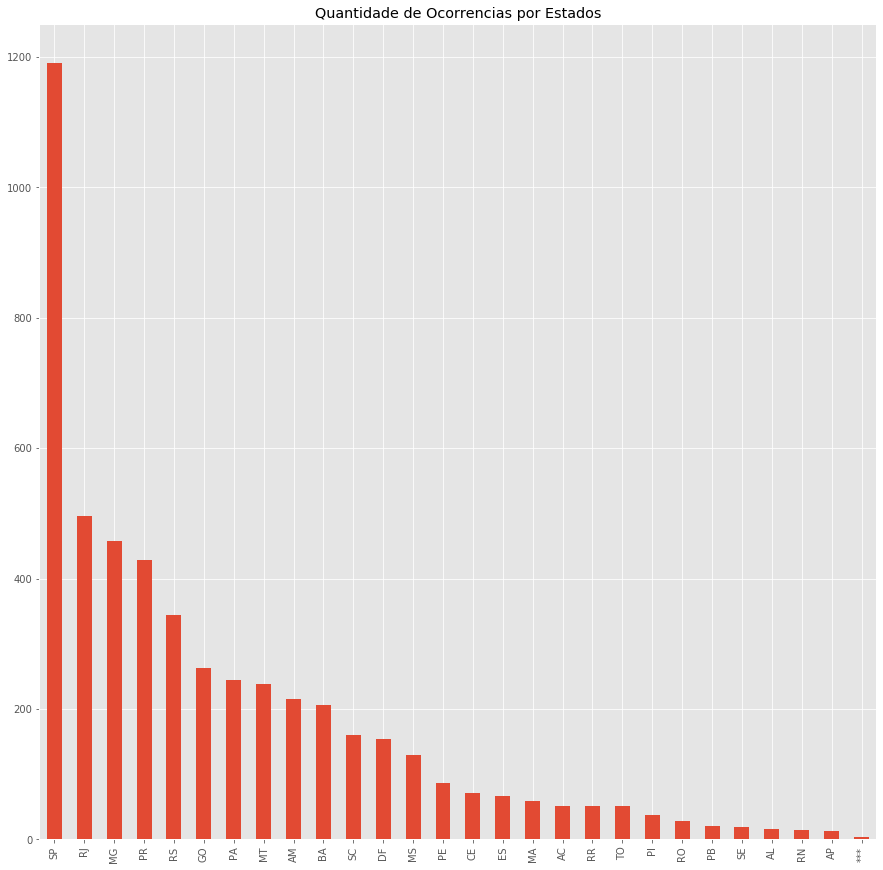

In [10]:
plt.style.use("ggplot")
acidentes_uf_bar = dados['ocorrencia_uf'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label='Quantidade de Ocorrencias por Estados',
                                                         figsize=(15,15))

### Gráfico com Quantidade de Acidentes por UF

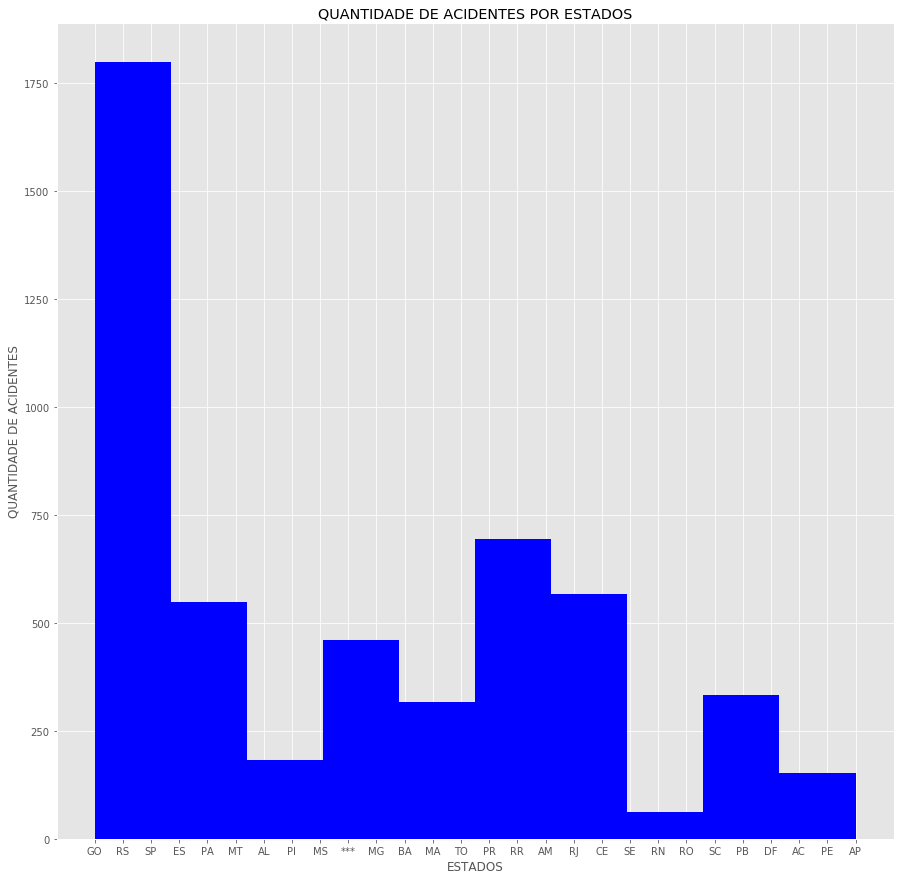

In [11]:
dados['ocorrencia_uf'].hist(figsize=(15, 15), color='Blue')
plt.title("QUANTIDADE DE ACIDENTES POR ESTADOS")
plt.xlabel("ESTADOS")
plt.ylabel("QUANTIDADE DE ACIDENTES")
plt.show()

### Adicionando Coluna "ano" aos Dados

In [12]:
data_ocorrencias = []
for i in range(len(dados)):
  data_ocorrencias.append(dados['ocorrencia_dia'][i])

anos_ocorrencias = []
ano = []
for i in range(len(data_ocorrencias)):
  ano.append(data_ocorrencias[i].split('-'))
  anos_ocorrencias.append(ano[i][0])

# Transformar anos para inteiro
anos_int = []
for i in range(len(anos_ocorrencias)):
  anos_int.append(int(anos_ocorrencias[i]))
anos_int

dados['ano'] = anos_int
# Rows 5116
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2012
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,2018-05-06,2009


### Dados de Latitude e Longitude (Decimal) dos Estados


In [13]:
dados_lat_long = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/MunicipiosBrasil.csv')

dados_lat_long

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,2.0,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17.842.150.988.839
1,3.0,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,9.337.339.431.323
2,4.0,-9.83,-67.95,BUJARI - AC,BUJARI,AC,2.851.656.749.286
3,5.0,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18.886.455.136.104
4,6.0,-7.63,-72.67,CRUZEIRO DO SUL - AC,CRUZEIRO DO SUL,AC,36.458.613.831.064
...,...,...,...,...,...,...,...
5510,NaN,-14.53,-59.54,CONQUISTA D'OESTE - MT,CONQUISTA D'OESTE,MT,NaN
5511,NaN,-18.67,-53.63,FIGUEIRAO - MS,FIGUEIRAO,MS,NaN
5512,NaN,-12.08,-45.78,LUIS EDUARDO MAGALHAES - BA,LUIS EDUARDO MAGALHAES,BA,NaN
5513,NaN,-23.53,-46.21,MOGI DAS CRUZES - SP,MOGI DAS CRUZES,SP,NaN


In [0]:
# Esses Dados já foram inseridos em um novo CSV

# Criando colunas latitude e longitude
#dados['latitude'] = -9.42
#dados['longitude'] = -30.89

# Passando valores de base_geo_br.csv para dados
#for i in range(len(dados_lat_long)):
#  for k in range(len(dados)):
#    if (dados['ocorrencia_cidade'][k] == dados_lat_long['MUNICIPIO'][i]) and (dados['ocorrencia_uf'][k] == dados_lat_long['UF'][i]):
#      dados['latitude'][k] = dados_lat_long['LATITUDE'][i]
#      dados['longitude'][k] = dados_lat_long['LONGITUDE'][i]

In [0]:
#export_csv = dados.to_csv(r'drive/My Drive/dados_prontos.csv', index = None, header=True)

In [14]:
dados_prontos = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/dados_prontos.csv')
dados_prontos.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano,latitude,longitude
0,201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,2012-11-15,12:40:00,ABADIA DE GOIAS,GO,BRASIL,****,PPZGV,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,1.0,430,2.0,1985.0,BRASIL,PET,EXPERIMENTAL,****,****,MANOBRA,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2012,-16.75,-49.43
1,200912289948837,ACIDENTE,PERDA DE CONTROLE EM VOO,2009-12-28,17:30:00,ACEGUA,RS,BRASIL,****,PRSUB,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,1.0,1812,1.0,1973.0,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,1.0,1,2018-05-06,2009,-31.87,-54.15


## Quantidade de Acidentes por Cidades

In [0]:
j = 0
for i in range(len(dados_prontos)):
  if dados_prontos['ocorrencia_cidade'] == 'SAO PAULO':
    

## Gerando Mapas

### Pop-up Map

In [24]:
mapa_br = folium.Map(location=[-12, -50],
                 zoom_start = 5, control_scale = True, prefer_canvas=True)


for i in range (1000):
  if dados_prontos['ocorrencia_uf'][i] == 'SP': 
    folium.Marker(
        location=[dados_prontos['latitude'][i], dados_prontos['longitude'][i]],
        popup="Codigo da Ocorrencia:"+str(dados_prontos['codigo_ocorrencia'][i])+"<br>"
              +"<br>Estado(UF):"+dados_prontos['ocorrencia_uf'][i]+"<br>"
              +"<br>Tipo de Ocorrencia:"+dados_prontos['ocorrencia_tipo'][i]+"<br>"
              +"<br>Cidade:"+dados_prontos['ocorrencia_cidade'][i]+"<br>"
              +"<br>Data:"+dados_prontos['ocorrencia_dia'][i],
        icon=folium.Icon(color='red', icon='info-sign'),
    ).add_to(mapa_br)

mapa_br

### Bubble Map

In [59]:
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data


,lat,lon,name,value
0,-58.00,-34.00,Buenos Aires,10
1,2.00,49.00,Paris,12
2,145.00,-38.00,melbourne,40
3,30.32,59.93,St Petersbourg,70
4,-4.03,5.33,Abidjan,23
5,-73.57,45.52,Montreal,43
6,36.82,-1.29,Nairobi,100
7,-38.50,-12.97,Salvador,43


In [87]:
quantidade = dados_prontos['ocorrencia_cidade'].value_counts()

nome = []
lat = []
lon = []
quant = []
for i in range((len(dados_prontos))-1):
  nome[i] = dados_prontos['ocorrencia_cidade']
  lat[i] = dados_prontos['latitude']
  lon[i] = dados_prontos['longitude']

dados_quantidade = pd.DataFrame({'nome':nome, 'quantidade':quantidade, 'lat':lat, 'lon':lon})
dados_quantidade

IndexError: ignored

In [0]:
m = folium.Map(location=[-12, -50],
                 zoom_start = 5, control_scale = True, prefer_canvas=True)



In [0]:
data['value']=data.value.astype(float)

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


In [79]:
quantidade=data.value.astype(float)

for i in range(0,100):
   folium.Circle(
      location=[dados_prontos.iloc[i]['longitude'], dados_prontos.iloc[i]['latitude']],
      popup=dados_prontos.iloc[i]['ocorrencia_uf'],
      radius=*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


SyntaxError: ignored

In [0]:
m